In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"
    
def is_weekend(weekday):
    return weekday in [5,6]

In [3]:
f=pd.read_csv("/Users/katrinepedersen/Desktop/Trips_2018.csv")

In [4]:
f.describe()

,Unnamed: 0,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,8.774169e+06,9.887432e+02,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,5.065769e+06,1.889584e+04,1.439432e+03,3.225813e-02,1.912753e-02,1.438502e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,0.000000e+00,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.387084e+06,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,8.774169e+06,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.316125e+07,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.754834e+07,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


In [5]:

f['starttime'] = pd.to_datetime(f['starttime'], format='%Y-%m-%d %H:%M:%S.%f')
f['stoptime'] = pd.to_datetime(f['stoptime'], format='%Y-%m-%d %H:%M:%S.%f')
f['weekday']= f['starttime'].dt.weekday
f['is_weekend']=[is_weekend(el) for el in f['weekday']]
sm_dummies=pd.get_dummies(f, columns=['usertype'])

In [6]:
f.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
weekday                             int32
is_weekend                           bool
dtype: object

In [7]:
sm_dummies.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
birth_year                          int64
gender                              int64
weekday                             int32
is_weekend                           bool
usertype_Customer                    bool
usertype_Subscriber                  bool
dtype: object

In [8]:
f

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,0,False
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,0,False
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,0,False
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,0,False
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548334,17548334,734,2018-12-31 23:55:06.991,2019-01-01 00:07:21.230,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,27111,Subscriber,1986,1,0,False
17548335,17548335,2551,2018-12-31 23:55:44.307,2019-01-01 00:38:15.782,3320.0,40.794067,-73.962868,2006.0,40.765909,-73.976342,16390,Customer,1969,0,0,False
17548336,17548336,2376,2018-12-31 23:56:52.850,2019-01-01 00:36:29.286,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,34398,Subscriber,1979,1,0,False
17548337,17548337,2758,2018-12-31 23:58:29.212,2019-01-01 00:44:27.517,3320.0,40.794067,-73.962868,281.0,40.764397,-73.973715,30818,Customer,1969,0,0,False


# Clustering

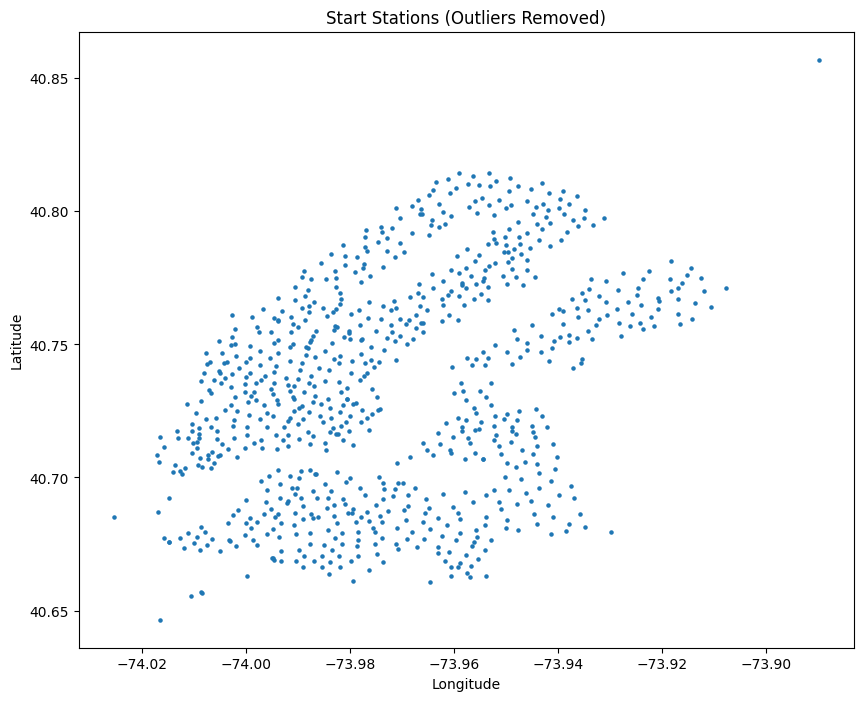

In [9]:
# Remove duplicates by station
new_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
new_df = new_df.set_index("start_station_id")

# Find max longitude and max latitude
max_lon = new_df['start_station_longitude'].max()
max_lat = new_df['start_station_latitude'].max()

# Remove rows where longitude OR latitude is maximum
df_cleaned = new_df[
    ~((new_df['start_station_longitude'] == max_lon) |
      (new_df['start_station_latitude'] == max_lat))
]

# Scatter plot
plt.figure(figsize=(10,8))
plt.scatter(df_cleaned['start_station_longitude'], df_cleaned['start_station_latitude'], s=5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Start Stations (Outliers Removed)")
plt.show()

## DBScan

In [10]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(min_samples=30, eps=0.009) 
x = df_cleaned[['start_station_longitude', 'start_station_latitude']].values
dbs.fit(x)

DBSCAN(eps=0.009, min_samples=30)

In [11]:
dbs.labels_

array([-1,  0,  0,  1,  1, -1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  1,  0,  0,  0,  1,  1,
       -1,  1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1,
        0,  0,  0,  0,  0, -1,  1, -1,  0,  1,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,
       -1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  1,  1,  1,  0,  0,
       -1,  1,  1, -1,  0,  0,  0,  0,  0,  1,  1,  0, -1,  0,  0,  0, -1,
        0,  1,  0, -1, -1,  1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,
       -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1

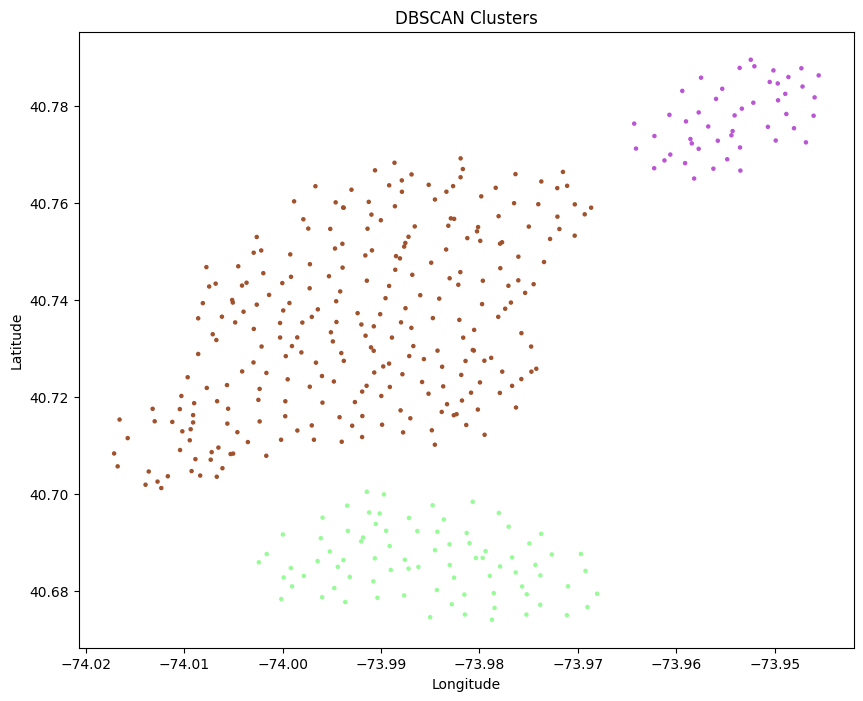

In [12]:
import random
from matplotlib import colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())

# Map each cluster label to a color
unique_labels = set(dbs.labels_)
unique_labels.discard(-1)
cluster_colors_map = {label: random.choice(colors) for label in unique_labels}

x_ = []
y_ = []
c_ = []
for label, coord in zip(dbs.labels_, x):
    if label == -1:
        continue
    x_.append(coord[0])  # longitude
    y_.append(coord[1])  # latitude
    c_.append(cluster_colors_map[label])

plt.figure(figsize=(10,8))
plt.scatter(x_, y_, s=5, c=c_)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN Clusters")
plt.show()

## K-means

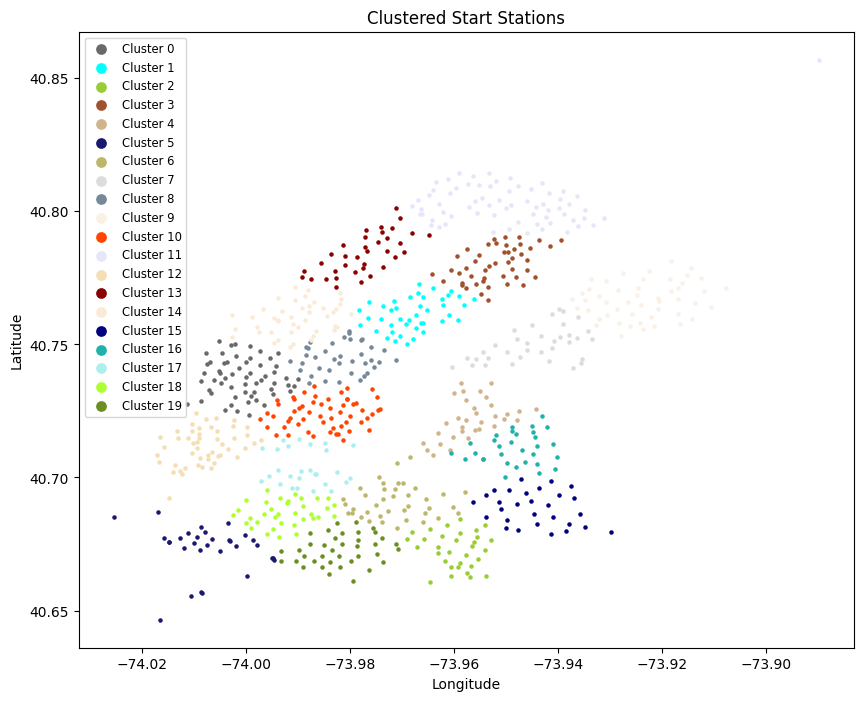

In [13]:
from sklearn.cluster import KMeans
K=20
k=KMeans(K)

k.fit(df_cleaned)
dt_clusters=df_cleaned.copy()
dt_clusters['cluster']=k.fit_predict(df_cleaned)
dt_clusters
# Number of clusters (excluding label -1)
num_colors = K  # number of clusters
colors = list(mcolors.CSS4_COLORS.keys())
cluster_colors = random.sample(colors, k=num_colors)  # better than choices for unique colors

# Coordinates and labels
x_points = dt_clusters["start_station_longitude"]
y_points = dt_clusters["start_station_latitude"]
labels = dt_clusters["cluster"]

plt.figure(figsize=(10, 8))

# Plot each cluster separately with its own color and label
for label in sorted(set(labels)):
    if label == -1:
        continue  # skip noise points
    cluster_mask = labels == label
    plt.scatter(
        x_points[cluster_mask],
        y_points[cluster_mask],
        s=5,
        c=cluster_colors[label],
        label=f"Cluster {label}"
    )

# Optional: if you want to visualize noise (-1)
if -1 in labels.values:
    noise_mask = labels == -1
    plt.scatter(
        x_points[noise_mask],
        y_points[noise_mask],
        s=5,
        c="black",
        label="Noise (-1)"
    )

# Formatting
#plt.xlim(-74.05, -73.9)
#plt.ylim(40.6, 40.85)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clustered Start Stations")
plt.legend(markerscale=3, fontsize='small')
plt.show()

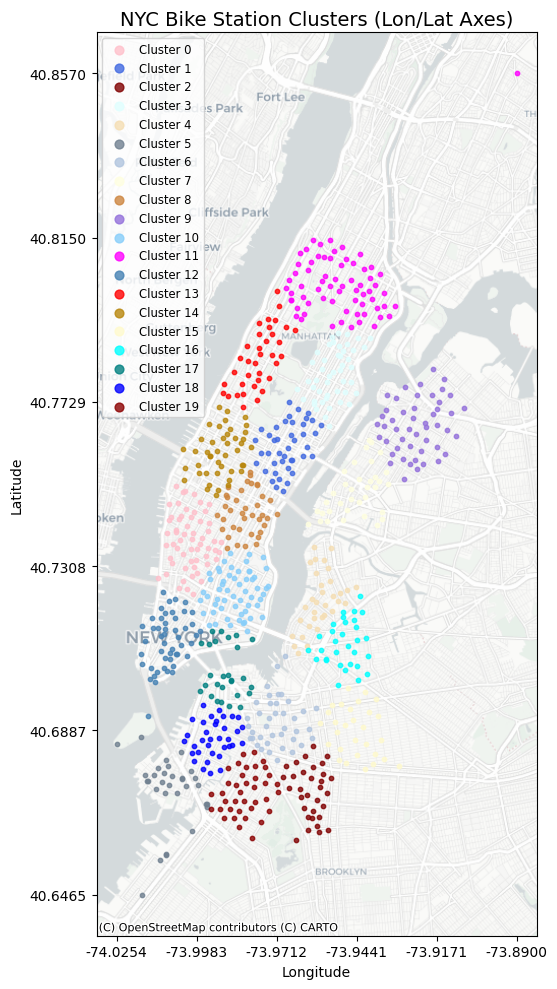

In [14]:
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import numpy as np
import pyproj

# Number of clusters (excluding -1)
num_colors = K
colors = list(mcolors.CSS4_COLORS.keys())
cluster_colors = random.sample(colors, k=num_colors)

# Create GeoDataFrame with geometry in lon/lat
geometry = [Point(xy) for xy in zip(
    dt_clusters["start_station_longitude"],
    dt_clusters["start_station_latitude"]
)]
gdf = gpd.GeoDataFrame(dt_clusters, geometry=geometry, crs="EPSG:4326")

# Convert to Web Mercator for basemap
gdf_3857 = gdf.to_crs(epsg=3857)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 10))

# Map cluster label → color
unique_labels = sorted(set(gdf["cluster"]))
unique_labels = [l for l in unique_labels if l != -1]
label_color_map = {label: cluster_colors[i] for i, label in enumerate(unique_labels)}

# Plot clusters
for label in unique_labels:
    mask = gdf_3857["cluster"] == label
    gdf_3857[mask].plot(
        ax=ax,
        markersize=10,
        color=label_color_map[label],
        label=f"Cluster {label}",
        alpha=0.8
    )

# Optional: plot noise (-1)
if -1 in gdf_3857["cluster"].values:
    gdf_3857[gdf_3857["cluster"] == -1].plot(
        ax=ax,
        markersize=8,
        color="black",
        label="Noise (-1)",
        alpha=0.5
    )

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# -----------------------------
# Set axis ticks to longitude/latitude
# -----------------------------
project = pyproj.Transformer.from_crs(3857, 4326, always_xy=True)
xticks = np.linspace(gdf_3857.total_bounds[0], gdf_3857.total_bounds[2], 6)
yticks = np.linspace(gdf_3857.total_bounds[1], gdf_3857.total_bounds[3], 6)
xtick_labels, ytick_labels = project.transform(xticks, yticks)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels([f"{x:.4f}" for x in xtick_labels])
ax.set_yticklabels([f"{y:.4f}" for y in ytick_labels])

# Formatting
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("NYC Bike Station Clusters (Lon/Lat Axes)", fontsize=14)
ax.legend(markerscale=2, fontsize="small", loc="upper left")
plt.tight_layout()
plt.show()



In [15]:
df_merged = f.merge(dt_clusters[['cluster']], left_on = "start_station_id", right_index = True, how = "left")
df_merged = df_merged.drop(columns = ["Unnamed: 0"])

In [16]:
df_merged

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,0,False,14.0
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,0,False,14.0
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,0,False,14.0
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,0,False,14.0
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,0,False,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548334,734,2018-12-31 23:55:06.991,2019-01-01 00:07:21.230,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,27111,Subscriber,1986,1,0,False,0.0
17548335,2551,2018-12-31 23:55:44.307,2019-01-01 00:38:15.782,3320.0,40.794067,-73.962868,2006.0,40.765909,-73.976342,16390,Customer,1969,0,0,False,11.0
17548336,2376,2018-12-31 23:56:52.850,2019-01-01 00:36:29.286,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,34398,Subscriber,1979,1,0,False,12.0
17548337,2758,2018-12-31 23:58:29.212,2019-01-01 00:44:27.517,3320.0,40.794067,-73.962868,281.0,40.764397,-73.973715,30818,Customer,1969,0,0,False,11.0


In [36]:
cluster_16_df = df_merged[df_merged["cluster"] == 16]

In [37]:
cluster_16_df

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster
303902,172,2018-01-01 01:23:59.355,2018-01-01 01:26:51.465,471.0,40.712868,-73.956981,3093.0,40.717452,-73.958509,31263,Subscriber,1990,1,0,False,16.0
303903,933,2018-01-01 14:35:51.107,2018-01-01 14:51:24.826,471.0,40.712868,-73.956981,120.0,40.686768,-73.959282,30098,Subscriber,1980,1,0,False,16.0
303904,669,2018-01-02 00:48:50.747,2018-01-02 01:00:00.112,471.0,40.712868,-73.956981,3067.0,40.701666,-73.943730,19589,Subscriber,1995,1,1,False,16.0
303905,226,2018-01-02 05:44:51.955,2018-01-02 05:48:38.910,471.0,40.712868,-73.956981,2002.0,40.716887,-73.963198,19418,Subscriber,1984,1,1,False,16.0
303906,342,2018-01-02 06:35:25.870,2018-01-02 06:41:08.182,471.0,40.712868,-73.956981,3101.0,40.720798,-73.954847,29371,Subscriber,1976,1,1,False,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548116,1663,2018-12-31 21:23:00.952,2018-12-31 21:50:44.717,3087.0,40.714133,-73.952344,2000.0,40.702551,-73.989402,35787,Customer,1983,1,0,False,16.0
17548128,1355,2018-12-31 21:29:46.499,2018-12-31 21:52:21.968,3714.0,40.706842,-73.954435,324.0,40.689888,-73.981013,35742,Subscriber,1993,1,0,False,16.0
17548222,665,2018-12-31 22:28:03.228,2018-12-31 22:39:08.471,3076.0,40.708704,-73.944862,3058.0,40.692371,-73.937054,31113,Subscriber,1990,1,0,False,16.0
17548244,443,2018-12-31 22:43:36.342,2018-12-31 22:50:59.628,3094.0,40.716981,-73.944859,3113.0,40.730260,-73.953940,33753,Subscriber,1989,2,0,False,16.0


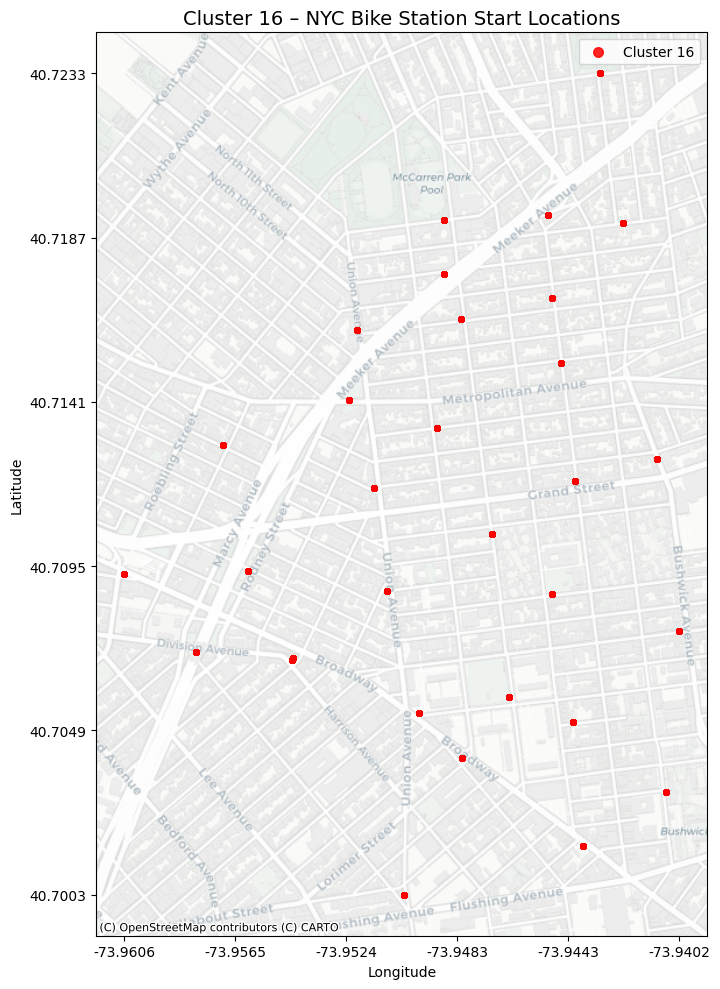

In [39]:
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import numpy as np
import pyproj

# Use only cluster 16 data
gdf = cluster_16_df.copy()

# Create geometry
geometry = [Point(xy) for xy in zip(
    gdf["start_station_longitude"],
    gdf["start_station_latitude"]
)]
gdf = gpd.GeoDataFrame(gdf, geometry=geometry, crs="EPSG:4326")

# Convert to Web Mercator
gdf_3857 = gdf.to_crs(epsg=3857)

# Choose ONE color for cluster 16
color_16 = "red"   # or random.choice(list(mcolors.CSS4_COLORS.keys()))

# Plot setup
fig, ax = plt.subplots(figsize=(10, 10))

# Plot only cluster 16
gdf_3857.plot(
    ax=ax,
    markersize=12,
    color=color_16,
    label="Cluster 16",
    alpha=0.85
)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# -------- Axis ticks (convert back to lon/lat) --------
project = pyproj.Transformer.from_crs(3857, 4326, always_xy=True)
xticks = np.linspace(gdf_3857.total_bounds[0], gdf_3857.total_bounds[2], 6)
yticks = np.linspace(gdf_3857.total_bounds[1], gdf_3857.total_bounds[3], 6)
xtick_labels, ytick_labels = project.transform(xticks, yticks)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels([f"{x:.4f}" for x in xtick_labels])
ax.set_yticklabels([f"{y:.4f}" for y in ytick_labels])



# Formatting
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Cluster 16 – NYC Bike Station Start Locations", fontsize=14)
ax.legend(markerscale=2, fontsize="medium")
plt.tight_layout()
plt.show()


## Explore data time series concept 

## Modelling

In [46]:
cluster_16_df

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster
303902,172,2018-01-01 01:23:59.355,2018-01-01 01:26:51.465,471.0,40.712868,-73.956981,3093.0,40.717452,-73.958509,31263,Subscriber,1990,1,0,False,16.0
303903,933,2018-01-01 14:35:51.107,2018-01-01 14:51:24.826,471.0,40.712868,-73.956981,120.0,40.686768,-73.959282,30098,Subscriber,1980,1,0,False,16.0
303904,669,2018-01-02 00:48:50.747,2018-01-02 01:00:00.112,471.0,40.712868,-73.956981,3067.0,40.701666,-73.943730,19589,Subscriber,1995,1,1,False,16.0
303905,226,2018-01-02 05:44:51.955,2018-01-02 05:48:38.910,471.0,40.712868,-73.956981,2002.0,40.716887,-73.963198,19418,Subscriber,1984,1,1,False,16.0
303906,342,2018-01-02 06:35:25.870,2018-01-02 06:41:08.182,471.0,40.712868,-73.956981,3101.0,40.720798,-73.954847,29371,Subscriber,1976,1,1,False,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548116,1663,2018-12-31 21:23:00.952,2018-12-31 21:50:44.717,3087.0,40.714133,-73.952344,2000.0,40.702551,-73.989402,35787,Customer,1983,1,0,False,16.0
17548128,1355,2018-12-31 21:29:46.499,2018-12-31 21:52:21.968,3714.0,40.706842,-73.954435,324.0,40.689888,-73.981013,35742,Subscriber,1993,1,0,False,16.0
17548222,665,2018-12-31 22:28:03.228,2018-12-31 22:39:08.471,3076.0,40.708704,-73.944862,3058.0,40.692371,-73.937054,31113,Subscriber,1990,1,0,False,16.0
17548244,443,2018-12-31 22:43:36.342,2018-12-31 22:50:59.628,3094.0,40.716981,-73.944859,3113.0,40.730260,-73.953940,33753,Subscriber,1989,2,0,False,16.0


In [47]:
cluster_16_df = cluster_16_df.set_index('starttime')
cluster_16_df

,tripduration,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster
starttime,,,,,,,,,,,,,,,
2018-01-01 01:23:59.355,172,2018-01-01 01:26:51.465,471.0,40.712868,-73.956981,3093.0,40.717452,-73.958509,31263,Subscriber,1990,1,0,False,16.0
2018-01-01 14:35:51.107,933,2018-01-01 14:51:24.826,471.0,40.712868,-73.956981,120.0,40.686768,-73.959282,30098,Subscriber,1980,1,0,False,16.0
2018-01-02 00:48:50.747,669,2018-01-02 01:00:00.112,471.0,40.712868,-73.956981,3067.0,40.701666,-73.943730,19589,Subscriber,1995,1,1,False,16.0
2018-01-02 05:44:51.955,226,2018-01-02 05:48:38.910,471.0,40.712868,-73.956981,2002.0,40.716887,-73.963198,19418,Subscriber,1984,1,1,False,16.0
2018-01-02 06:35:25.870,342,2018-01-02 06:41:08.182,471.0,40.712868,-73.956981,3101.0,40.720798,-73.954847,29371,Subscriber,1976,1,1,False,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:23:00.952,1663,2018-12-31 21:50:44.717,3087.0,40.714133,-73.952344,2000.0,40.702551,-73.989402,35787,Customer,1983,1,0,False,16.0
2018-12-31 21:29:46.499,1355,2018-12-31 21:52:21.968,3714.0,40.706842,-73.954435,324.0,40.689888,-73.981013,35742,Subscriber,1993,1,0,False,16.0
2018-12-31 22:28:03.228,665,2018-12-31 22:39:08.471,3076.0,40.708704,-73.944862,3058.0,40.692371,-73.937054,31113,Subscriber,1990,1,0,False,16.0


In [48]:
tripduration = cluster_16_df["tripduration"]


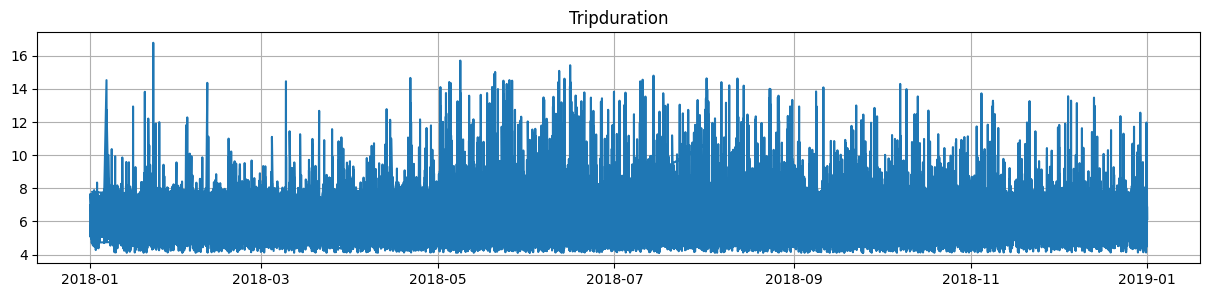

In [53]:
tripduration = cluster_16_df["tripduration"]

plt.figure(figsize=(15, 3))
plt.plot(np.log(tripduration))
plt.title('Tripduration')
plt.grid(True)
plt.show()